In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import math
data = np.load("C:\\Users\\baljyot\\Downloads\\mnist.npz")
# data = np.load("/home/iiitd/Downloads/mnist.npz")
x_train=data['x_train']
y_train=data['y_train']
x_test=data['x_test']
y_test=data['y_test']

indices = np.where((y_train == 0) | (y_train == 1) | (y_train == 2))[0]
x_train = x_train[indices]
y_train = y_train[indices]
indices = np.where((y_test == 0) | (y_test == 1) | (y_test == 2))[0]
x_test = x_test[indices]
y_test = y_test[indices]

print("Shape of new_x_train:", x_train.shape)
print("Shape of new_y_train:", y_train.shape)


Shape of new_x_train: (18623, 28, 28)
Shape of new_y_train: (18623,)


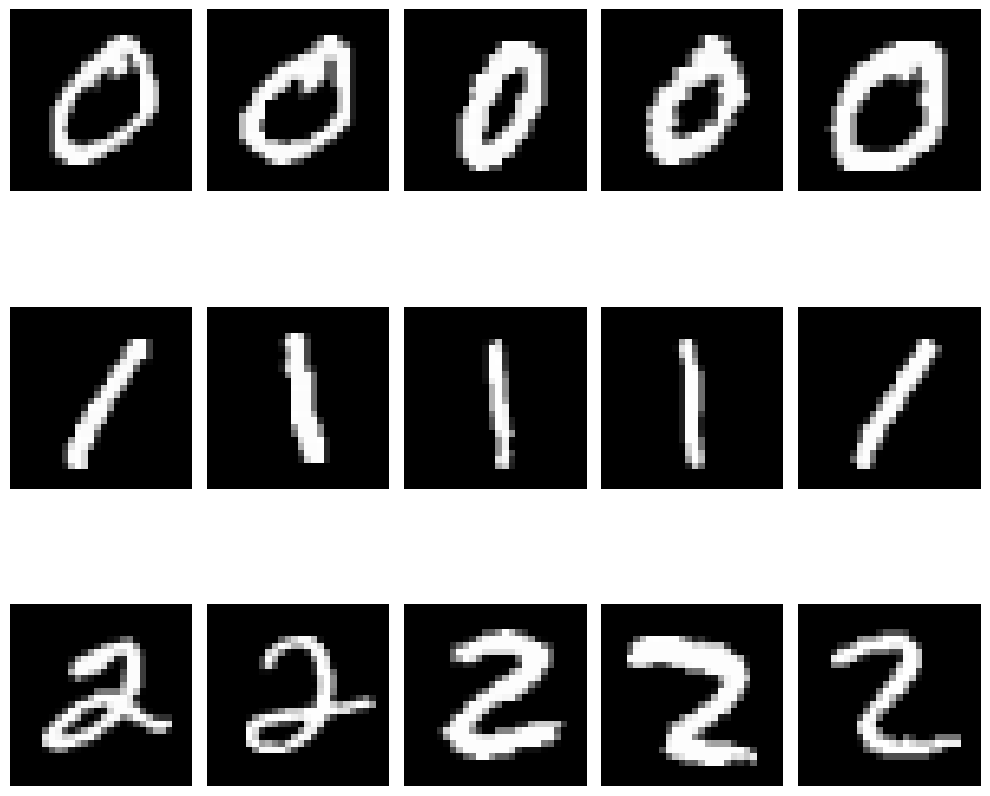

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(10, 10))
axes = axes.flatten()

for k in range(3):  # Iterate through classes 0, 1, and 2
    index = np.where(y_train == k)[0]
    for i in range(5):
        ax = axes[k * 5 + i]
        ax.imshow(x_train[index[i]], cmap='gray')
        ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
flattened=[]
for i in range(len(x_train)):
    flattened.append(x_train[i].flatten())
x_train=np.array(flattened)
flattened=[]
for i in range(len(x_test)):
    flattened.append(x_test[i].flatten())
x_test=np.array(flattened)

In [5]:

print(len(np.where(y_train == 0)[0]))

print(len(np.where(y_train == 1)[0]))

print(len(np.where(y_train == 2)[0]))

5923
6742
5958


In [6]:
x_train=np.transpose(x_train)
sums=[]
centralisedMean=np.mean(x_train,axis=1)

print("Shape of new_x_train:", x_train.shape)
centralisedData=[]
for i in range(x_train.shape[0]):
    l=[]
    # for j in range(60000):
    for j in range(x_train.shape[1]):
        l.append(x_train[i][j]- centralisedMean[i])
    centralisedData.append(l)
centralisedMean=np.array(np.mean(centralisedData,axis=1))

S=np.matmul( centralisedData ,np.transpose(centralisedData))/18622

eigenvalues, eigenvectors = np.linalg.eigh(S)
eigenvalues = eigenvalues[::-1]
U = np.flip(eigenvectors, axis=1)

nUp=U[:,:10]

x_proj=np.matmul(nUp.T,x_train-x_train.mean(axis=1)[:,np.newaxis])

Shape of new_x_train: (784, 18623)


In [7]:
x_test=np.transpose(x_test)
sums=[]
centralisedMean=np.mean(x_test,axis=1)

print("Shape of new_x_train:", x_test.shape)
centralisedData=[]
for i in range(x_test.shape[0]):
    l=[]
    # for j in range(60000):
    for j in range(x_test.shape[1]):
        l.append(x_test[i][j]- centralisedMean[i])
    centralisedData.append(l)
centralisedMean=np.array(np.mean(centralisedData,axis=1))

S=np.matmul( centralisedData ,np.transpose(centralisedData))/18622

eigenvalues, eigenvectors = np.linalg.eigh(S)
eigenvalues = eigenvalues[::-1]
U = np.flip(eigenvectors, axis=1)

nUp=U[:,:10]

x_proj_test=np.matmul(nUp.T,x_test-x_test.mean(axis=1)[:,np.newaxis])

Shape of new_x_train: (784, 3147)


In [8]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.p = None
        self.wG_r=None
        self.wG_l=None
        self.leaf_value=None
        self.threshold=None



In [9]:
class Region:
    def __init__(self):
        self.one=0
        self.two=0
        self.zero=0
        self.total=0
        self.gini=0
    def add_value(self, input_value):
        self.total+=1
        if input_value == 1:
            self.one += 1
        elif input_value == 2:
            self.two += 1
        elif input_value == 0:
            self.zero += 1
    def calc_gini_index(self):
        
        p1=self.one/self.total
        p2=self.two/self.total
        p3=self.zero/self.total

        self.gini=p1*(1-p1)+p2*(1-p2)+p3*(1-p3)

        return self.gini
    def predict(self):
        if (self.one > self.two and self.one >self.zero):
            return 1
        if (self.two > self.one and self.two >self.zero):
            return 2
        if (self.zero > self.two and self.zero >self.one):
            return 0
    def print(self):
        print("0 : ",self.zero)
        print("1 : ",self.one)

        print("2 : ",self.two)


        

In [26]:
import copy


def get_best_split(dataset,y_test):
    # dataset.shape=10 * (num of datapoints)
    # print(dataset.shape)

    best_split_gini=-2
    best_split={}
    for p in range(10):
        # print("for ",p)
        threshold=round(np.mean(dataset[p]),2)
        # print("threshold ", threshold)

        left_region=Region()
        right_region=Region()
        for i in range(len(dataset[p])):
            if (dataset[p][i]<=threshold):
                left_region.add_value(y_test[i])
            else:
                right_region.add_value(y_test[i])
        # print("printing regions")
        # left_region.print()
        # right_region.print()
        w_l=left_region.total/(left_region.total+right_region.total)
        w_r=1-w_l
        G_l=left_region.calc_gini_index()
        G_r=right_region.calc_gini_index()
        curr_gini=w_l*G_l+w_r*G_r
        # print("gini ", curr_gini)

        if (best_split_gini==-2 or curr_gini<best_split_gini):
            best_split['wg_l']=w_l*G_l
            best_split['wg_r']=w_r*G_r
            best_split['p']=p
            best_split['threshold']=threshold
            column_p = dataset[p]
            indices_l = np.where(column_p <= threshold)[0]
            indices_r=np.where(column_p > threshold)[0]
            best_split['left_data']=dataset[:, indices_l]
            best_split['left_data_train']=y_test[indices_l]
            best_split['right_data']=dataset[: , indices_r]
            best_split['right_data_train']=y_test[indices_r]

            best_split['left_region']=copy.deepcopy(left_region)
            best_split['right_region']=copy.deepcopy(right_region)
            best_split_gini=curr_gini

    return best_split
get_best_split(x_proj, y_train)


{'wg_l': 0.2390237054262678,
 'wg_r': 0.20256043585804964,
 'p': 0,
 'threshold': 0.0,
 'left_data': array([[-870.01862089, -793.03018493, -853.74401019, ..., -714.48230102,
          -82.38960889, -816.4656097 ],
        [-264.3797051 ,  494.37141414,  699.04732881, ..., -308.73119359,
         -441.78769175,  100.66889002],
        [ 204.18027024, -164.69722344,    3.45882811, ...,  153.04759094,
          569.97704919,   94.29573561],
        ...,
        [ 229.1834776 ,  539.08733507,  356.5760564 , ...,  543.10080725,
         -141.23950427,   81.8445171 ],
        [ -65.4627142 , -236.9950432 ,  -67.10719465, ..., -309.58927423,
          167.86042662, -130.62112836],
        [ 226.45972164,  200.42064941,  136.46037792, ...,  247.90441085,
         -244.46406455,  255.47459791]]),
 'left_data_train': array([1, 1, 1, ..., 1, 2, 1], dtype=uint8),
 'right_data': array([[1139.38939686,  201.02244753,   74.47877235, ...,  406.45023776,
          427.4228413 ,  872.36875929],
        

In [27]:
def build_tree(dataset, num_leaf_nodes,y_train):
    # dataset.shape=10 * (num of datapoints)
    root = Node()
    curr=root
    curr_dataset=dataset
    curr_y_train=y_train
    for i in range(1,num_leaf_nodes):
        best_split=get_best_split(curr_dataset,curr_y_train)
        curr.p=best_split['p']
        curr.threshold=best_split['threshold']
        if(i==num_leaf_nodes-1):
            left=Node()
            right=Node()
            left.leaf_value=best_split['left_region'].predict()
            right.leaf_value=best_split['right_region'].predict()
            curr.left=left
            curr.right=right

        elif (best_split['wg_l']<=best_split['wg_r']):
            left=Node()
            left.leaf_value=best_split['left_region'].predict()
            right=Node()
            # curr=right
            curr_dataset=best_split['right_data']
            curr_y_train=best_split['right_data_train']
            curr.left=left
            curr.right=right
            curr=right

        else:
            right=Node()
            right.leaf_value=best_split['right_region'].predict()
            left=Node()
            # curr=left
            curr_dataset=best_split['left_data']
            curr_y_train=best_split['left_data_train']
            curr.left=left
            curr.right=right
            curr=left
    return root

        

In [28]:
def prediction(root,point):
    # point = 1*10
    while(True):
        if(root.leaf_value!=None):
            return root.leaf_value
        else:
            if (point[root.p]<=root.threshold):
                root=root.left
            else:
                root=root.right


In [29]:
def accuracy(root, X,Y):
    # x=10 * 18623
    X=X.T
    acurracies=[[0,0] for i in range(3) ]
    for i in range(X.shape[0]):
        acurracies[Y[i]][1]+=1
        if Y[i]==prediction(root, X[i]):
            acurracies[Y[i]][0]+=1
    return acurracies

In [30]:
root=build_tree(x_proj, 3, y_train)
acc=accuracy(root, x_proj,y_train)
tot=0
for i in acc:
    tot+=((i[0]/i[1])*100)
    print((i[0]/i[1])*100)
print(tot/3)

98.6662164443694
90.04746366063483
51.04061765693185
79.9180992539787


In [32]:
root=build_tree(x_proj, 3, y_train)
acc=accuracy(root, x_proj_test,y_test)
tot=0
for i in acc:
    tot+=((i[0]/i[1])*100)
    print((i[0]/i[1])*100)
print(tot/3)

0.9183673469387756
0.0
40.406976744186046
13.775114697041607


In [67]:
#building datasets
from typing import Counter


new_x_train=x_proj.T
size= int((new_y_train.shape)[0]/5)
print("Shape of new_y_train:",size )

D1=new_x_train[:size].T
D2=new_x_train[size:2*size].T

D3=new_x_train[2*size:3*size].T
D4=new_x_train[3*size:4*size].T

D5=new_x_train[4*size:5*size].T

D1_y=new_y_train[:size]
D2_y=new_y_train[size:2*size]

D3_y=new_y_train[2*size:3*size]
D4_y=new_y_train[3*size:4*size]

D5_y=new_y_train[4*size:5*size]

# print(len(D1[0])

D = np.vstack((D1, D2, D3, D4, D5))
print("Shape of matrix D:", D1.shape)
print(D1_y.shape)
r1=build_tree(D1, 3, D1_y)
r2=build_tree(D2, 3, D2_y)
r3=build_tree(D3, 3, D3_y)

r4=build_tree(D4, 3, D4_y)

r5=build_tree(D5, 3, D5_y)



Shape of new_y_train: 3724
Shape of matrix D: (10, 3724)
(3724,)
(10, 3724)
for  0
threshold  19.01
printing regions
0 :  17
1 :  1343
2 :  622
0 :  1186
1 :  5
2 :  551
gini  0.439549682381618
for  1
threshold  -23.98
printing regions
0 :  231
1 :  399
2 :  1074
0 :  972
1 :  949
2 :  99
gini  0.5381110623391956
for  2
threshold  37.9
printing regions
0 :  584
1 :  422
2 :  708
0 :  619
1 :  926
2 :  465
gini  0.6455043355740278
for  3
threshold  22.93
printing regions
0 :  515
1 :  604
2 :  877
0 :  688
1 :  744
2 :  296
gini  0.638574130797299
for  4
threshold  -18.18
printing regions
0 :  665
1 :  739
2 :  418
0 :  538
1 :  609
2 :  755
gini  0.654881932532271
for  5
threshold  6.21
printing regions
0 :  671
1 :  649
2 :  632
0 :  532
1 :  699
2 :  541
gini  0.6638876060316284
for  6
threshold  -3.58
printing regions
0 :  522
1 :  796
2 :  656
0 :  681
1 :  552
2 :  517
gini  0.6592699573510417
for  7
threshold  7.11
printing regions
0 :  649
1 :  649
2 :  628
0 :  554
1 :  699
2 :

In [ ]:

dataset=x_proj
dataset=dataset.T
accuracies=[[0,0] for i in range(3) ]
for i in range(dataset.shape[0]):
    accuracies[y_test[i]][1]+=1
    p1=prediction(r1,dataset[i])
    p2=prediction(r2,dataset[i])
    p3=prediction(r3,dataset[i])
    p4=prediction(r4,dataset[i])
    p5=prediction(r5,dataset[i])

    predictions = [p1, p2, p3, p4, p5]  
    pr
    final_prediction = majority_voting(predictions)

    # Check if the final prediction matches the ground truth
    if y_test[i] == final_prediction:
        # Increment correct count for the ground truth class
        accuracies[y_test[i]][0] += 1


acc=accuracies
total=0
for i in acc:
    total+=((i[0]/i[1])*100)
    print((i[0]/i[1])*100)
print(total/3)